ДЗ №8. Корреляционный анализ.

Задание №1. 
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

In [41]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

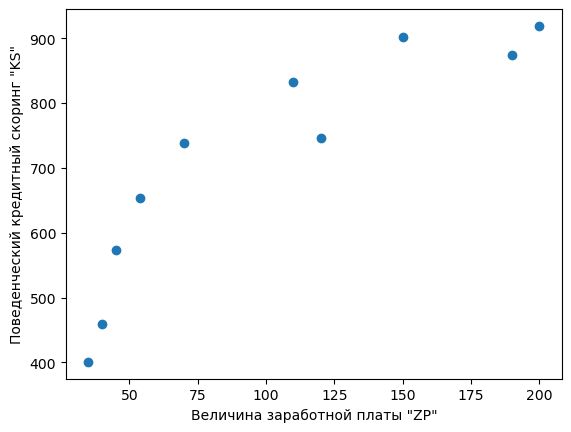

In [42]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы "ZP"')
plt.ylabel('Поведенческий кредитный скоринг "KS"', rotation=90)
plt.show()

Зависимость между величиной ЗП и кредитным скорингом - линейная. Ожидаем, что между этими данными существует положительная корреляция.

Вычисление ковариации с помощью элементарных действий:

Cov(xy) = M(xy) - M(x) * M(y)

In [43]:
cov_zp_ks = np.mean(zp*ks) - np.mean(zp)*np.mean(ks)
cov_zp_ks    

9157.839999999997

Вычисление ковариации через функцию:

In [44]:
cov_zp_ks = np.cov(zp, ks, ddof=0)[0, 1]
cov_zp_ks

9157.84

Вычислим коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков:

cor(zp,ks) = Cov(zp,ks) / {(var(zp)**0,5) * (var(ks)**0,5)}

In [45]:
corr = cov_zp_ks / (np.std(zp) * np.std(ks))
corr

0.8874900920739162

Numpy

In [46]:
corr_numpy = np.corrcoef(zp, ks)[0][1]
corr_numpy

0.8874900920739162

Pandas

In [47]:
corr_pandas = pd.Series(zp).corr(pd.Series(ks), method='pearson')
corr_pandas

0.8874900920739162

Задание №2.
Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [48]:
iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
alpha = 0.05

Для расчета доверительного интервала при неизвесной СКО будем использовать t-критерий и формулу для среднего арифметического:
 
 X(ср.арифм.) ± t (𝛂/2) * 𝜎/√n

In [49]:
n = iq.size
std = iq.std(ddof=1)
mean = iq.mean()
print(f' Размер выборки: n = {n}\n'f' Среднее квадратическое отклонение по выборке(несмещенное): {std:.2f}\n'f' Среднее выборочное: {mean:.2f}')

 Размер выборки: n = 10
 Среднее квадратическое отклонение по выборке(несмещенное): 10.55
 Среднее выборочное: 118.10


Значениe t и отклонение:

In [50]:
t = stats.t.ppf(1 - alpha / 2, n - 1)
d = t * std / (n) ** 0.5
d,t

(7.543916348412745, 2.2621571627409915)

Доверительный интервал:

In [51]:
min = mean - d
max = mean + d
print(f' Доверительный интервал для математического ожидания с надежностью 0.95 составляет:{min: .2f};{max: .2f}')

 Доверительный интервал для математического ожидания с надежностью 0.95 составляет: 110.56; 125.64


Задание №3. 
Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

Для расчета доверительного интервала при известной СКО будем использовать t-критерий и формулу для среднего арифметического:

X(ср.арифм.) ± t (𝛂/2) * 𝜎/√n


In [61]:
var = 25
n = 27
mean = 174.2
std = var**0.5
a = 0.05
t = stats.t.ppf (1 - a/2, n - 1)
d = z * std / (n ** 0.5)
t, d

(2.055529438642871, 1.977934124546103)

In [63]:
min = mean - d
max = mean + d
print(f' Доверительный интервал для математического ожидания с надежностью 0.95 составляет:{min: .2f};{max: .2f}')

 Доверительный интервал для математического ожидания с надежностью 0.95 составляет: 172.22; 176.18
